<a href="https://colab.research.google.com/github/EthelSotoA/Proyecto-Paro/blob/master/Ethel_Soto_4_2_5_Pr%C3%A1ctica_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 1
## Redes Neuronales Profundas

**Planteamiento del Problema:**

Se desea desarrollar un modelo de machine learning que cuente con la capacidad de evaluar de manera acelerada y precisa el valor de diversos bienes inmuebles para ofrecer recomendaciones dinámicas a futuros clientes que operan en un mercado de compra-venta de propiedades reduciendo así el costo de elevadas comisiones.

**Instrucciones:**

1.- Cargue el conjunto de datos y realice un análisis exploratorio apoyándose de visualizaciones para obtener un mejor entendimiento e identifique la unidad muestral más apropiada para modelar el problema. **(5 pts)**

2.- Limpie los datos y aplique las transformaciones que considere necesarias con el objetivo de mejorar el *Mean Squared Error (MSE)*. **(5 pts)**

3.- Defina una arquitectura basada en redes neuronales artificiales con el uso de TF2. **(5pts)**

4.- Entrene, optimice y evalúe el modelo diagnosticando si se encuentra sobreajustado y en caso de resultar positivo implemente regularización. **(5pts)**

### Conjunto de Datos

**Venta de Propiedades (Bienes Raíces)**

---

### Diccionario de Datos
|Variable | Descripción|
|---------|------------|    
|id     |Identificador único para cada casa vendida|
|date    |Fecha de la venta|
|price (target) | Precio de cada vivienda vendida|
|bedrooms | Número de dormitorios|
|bathrooms | Número de baños, donde 0.5 representa una habitación con inodoro pero sin ducha|
|sqft_living | Pies cuadrados del espacio habitable interior de los apartamentos
|sqft_lot | Pies cuadrados del terreno|
|floors | Número de pisos|
|waterfront | Variable dummy que indica si el apartamento tiene vista al mar o no|
|view | Índice de 0 a 4 de qué tan buena es la vista de la propiedad|
|condition | Índice de 1 a 5 sobre la condición del apartamento|
|grade | Índice del 1 al 13, en el que de 1 a 3 no llega a la construcción y diseño de edificios, 7 tiene un nivel promedio de construcción y diseño y 11 a 13 tiene un alto nivel de calidad de construcción y diseño.|
|sqft_above | Pies cuadrados del espacio interior de la vivienda que está por encima del nivel del suelo|
|sqft_basement | Pies cuadrados del espacio interior de la vivienda que está por debajo del nivel del suelo|
|yr_built | Año en que se construyó la casa inicialmente|
|yr_renovated | Año de la última renovación de la casa|
|zipcode| Área de código postal donde se encuentra la casa|
|lat | Latitud|
|long | Longitud|
|sqft_living15 |Pies cuadrados del espacio habitable interior de la vivienda para los 15 vecinos más cercanos|
|sqft_lot15 |Pies cuadrados de los lotes de terreno de los 15 vecinos más cercanos.|

#### 1.- Cargue el conjunto de datos y realice un análisis exploratorio apoyándose de visualizaciones para obtener un mejor entendimiento e identifique la unidad muestral más apropiada para modelar el problema. **(5 pts)**


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
from datetime import date,datetime,timedelta,time # Libreria para manejar datos de tiempo

### Lectura de datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df =	pd.read_csv('/content/drive/MyDrive/Datos/kc_house_data.csv',parse_dates=['date'])

### Pre-Visualización

In [4]:
df.shape

(21613, 21)

In [5]:
pd.set_option("max_columns", None)
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

- Creamos dos variables, mes y año con ayuda de la variable date, para asi poder analizar mejor en que mes del año se tienen mas ventas.
- Pocos inmuebles han sido renovados, los que no han sido renovados tiene un valor de 0 y los que si tienen la fecha de cuando fueron renovados; por lo tanto converimos esta variable en una variable binaria con 1 los que han sido renovados.

In [7]:
df['renovated'] = df['yr_renovated'].map(lambda x: 0 if x == 0 else 1)
df['year'] = df['date'].dt.year #Sacamos el año cuando ocurrio
df['month'] = df['date'].dt.month #Sacamos el mes cuando ocurrio pero en numero

In [8]:
pd.set_option('display.float_format', lambda x:'%.2f' %x) #quitamos la notacion cientifica
df.describe(percentiles=[0.01,0.50,0.75,0.99])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month
count,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00,21613.00
mean,4580301520.86,540088.14,3.37,2.11,2079.90,15106.97,1.49,0.01,0.23,3.41,7.66,1788.39,291.51,1971.01,84.40,98077.94,47.56,-122.21,1986.55,12768.46,0.04,2014.32,6.57
std,2876565571.31,367127.20,0.93,0.77,918.44,41420.51,0.54,0.09,0.77,0.65,1.18,828.09,442.58,29.37,401.68,53.51,0.14,0.14,685.39,27304.18,0.20,0.47,3.12
min,1000102.00,75000.00,0.00,0.00,290.00,520.00,1.00,0.00,0.00,1.00,1.00,290.00,0.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00,0.00,2014.00,1.00
1%,122033870.92,153500.36,2.00,1.00,720.00,1013.12,1.00,0.00,0.00,3.00,5.00,700.00,0.00,1904.00,0.00,98001.00,47.26,-122.41,950.00,1191.24,0.00,2014.00,1.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,0.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00,0.00,2014.00,6.00
75%,7308900445.00,645000.00,4.00,2.50,2550.00,10688.00,2.00,0.00,0.00,4.00,8.00,2210.00,560.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00,0.00,2015.00,9.00
99%,9558728047.20,1964400.00,6.00,4.25,4978.80,213008.00,3.00,0.00,4.00,5.00,11.00,4370.00,1660.00,2014.00,2008.00,98199.00,47.77,-121.78,4080.00,157687.00,1.00,2015.00,12.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,4820.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00,1.00,2015.00,12.00


- Podemos observar que en numero maximo de cuartos es 33 pero el 99% de nuestros datos se encuentran en 6 habitaciones. 
- La viata al mar la matoria de estos inmuebles no la tienen. Por lo tanto que le columns view tenga en su mayoria 0 de la escla del 0 al 4 tiene mucho sentido.

### Categorizacion de las variables

In [9]:
ls_cont = ['bedrooms', 'bathrooms', 'sqft_living','sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade','sqft_above', 
          'sqft_basement', 'yr_built', 'sqft_living15', 'sqft_lot15','renovated','year','month']
ls_fch = ['date']
ls_geo = ['lat', 'long', 'zipcode']
target = 'price'

### Visualización

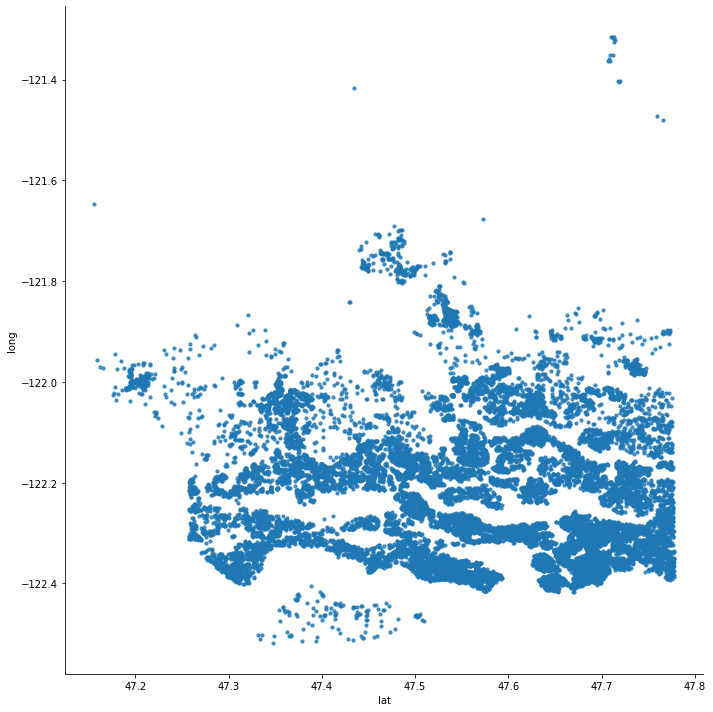

In [10]:
sns.lmplot(x='lat',y ='long',
           data=df, 
           fit_reg=False, 
          # hue='zipcode',
           #palette=sns.color_palette('RdBu'),
           height=10,ci=2, 
           scatter_kws={'marker':'D','s':10})

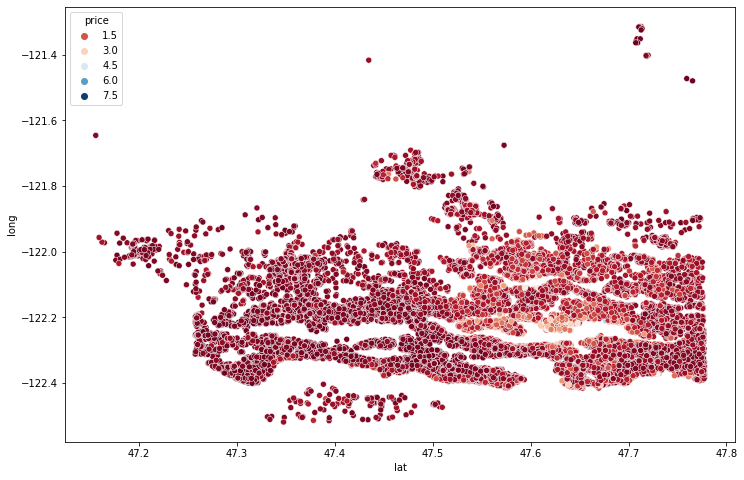

In [11]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='lat',y='long',hue='price',data=df,palette='RdBu')

In [12]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'year',
       'month'],
      dtype='object')

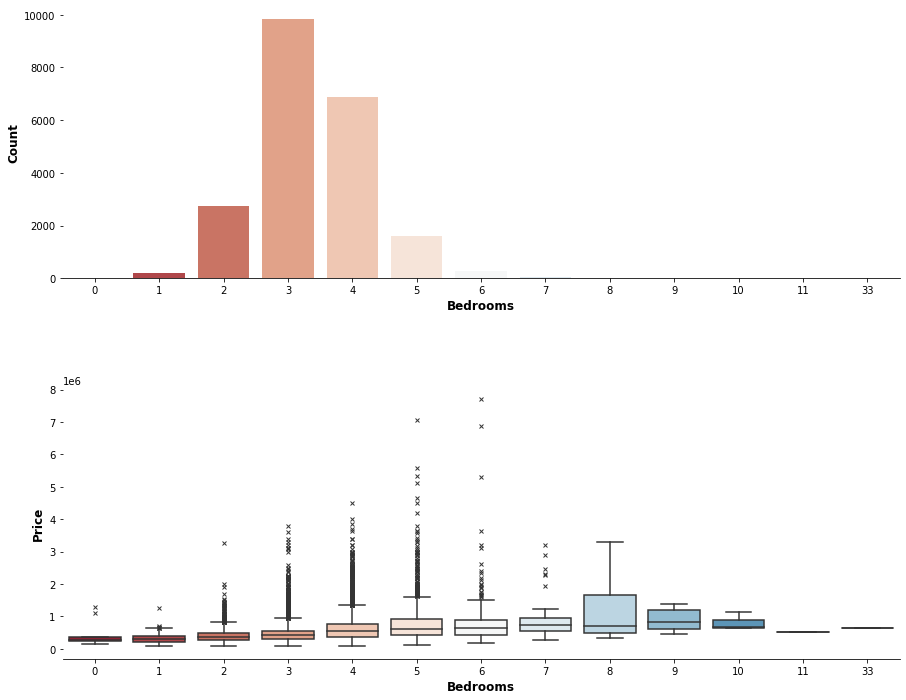

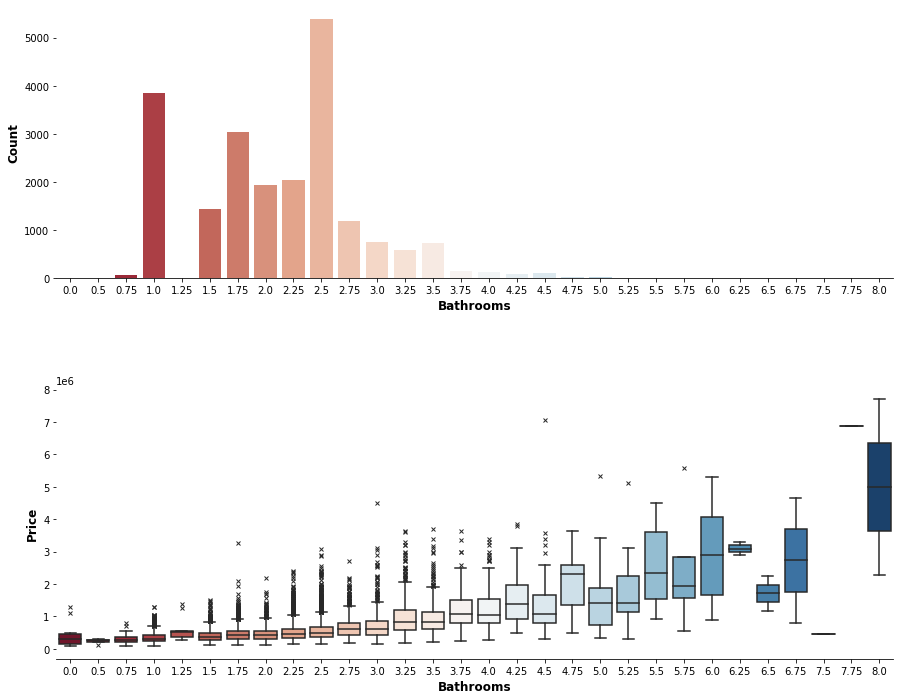

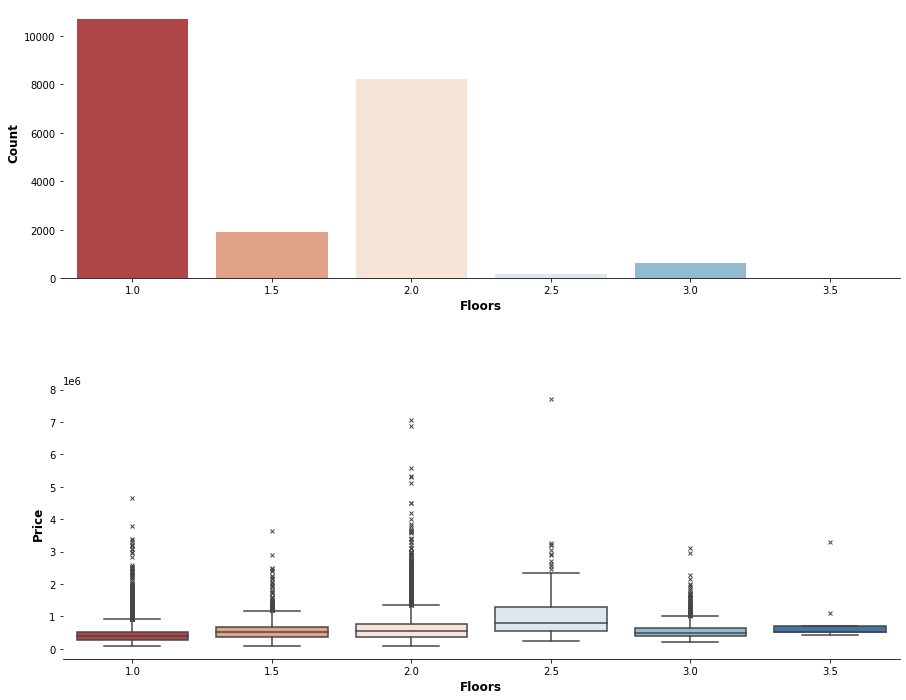

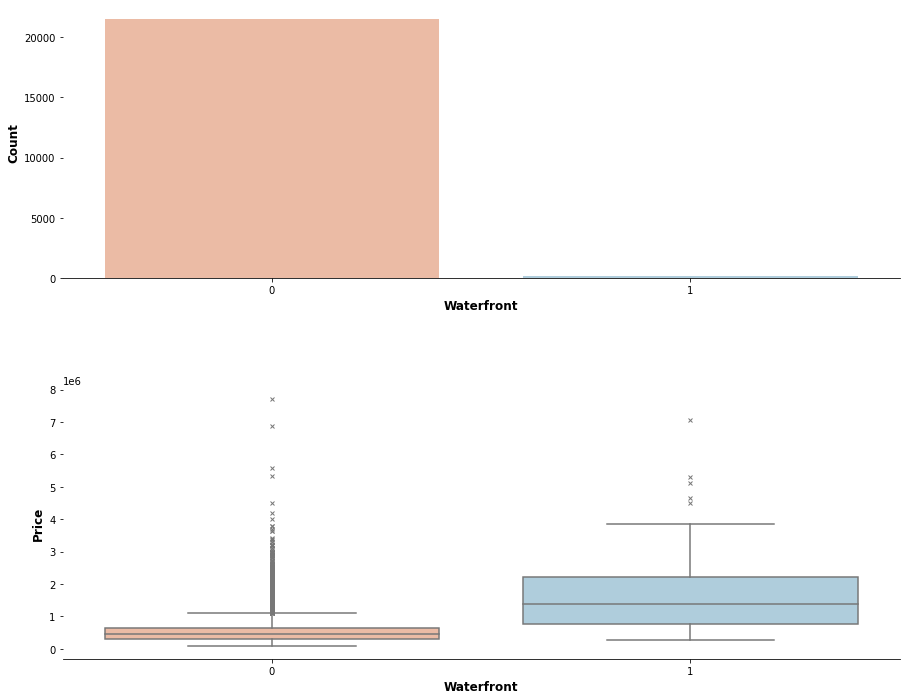

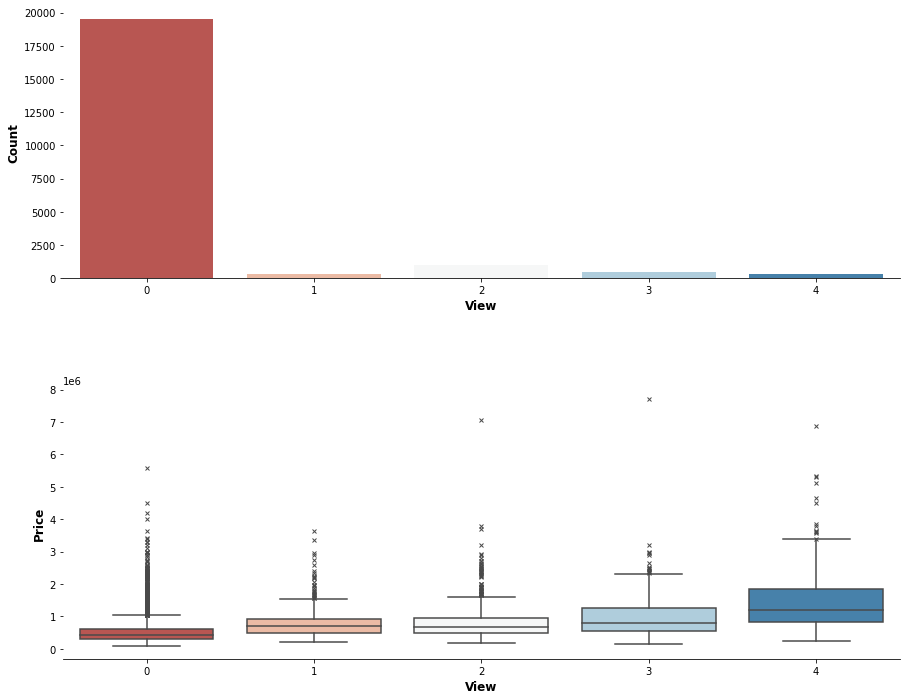

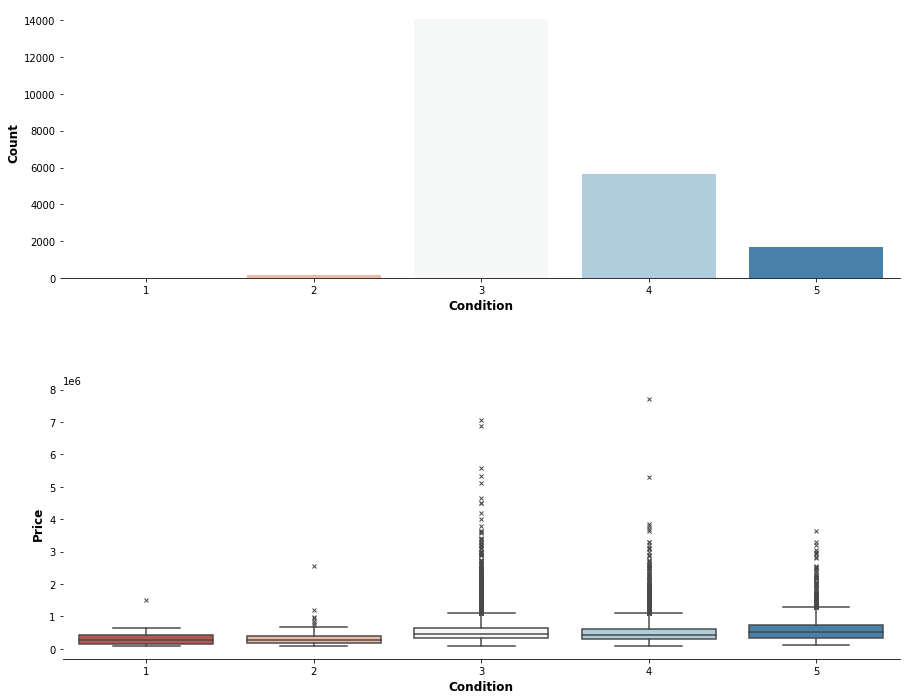

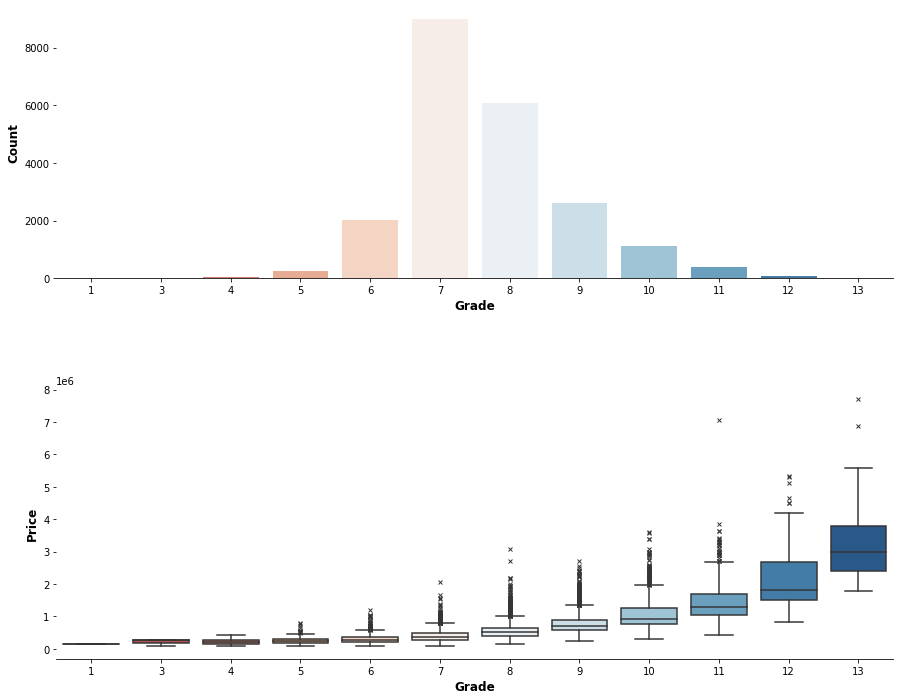

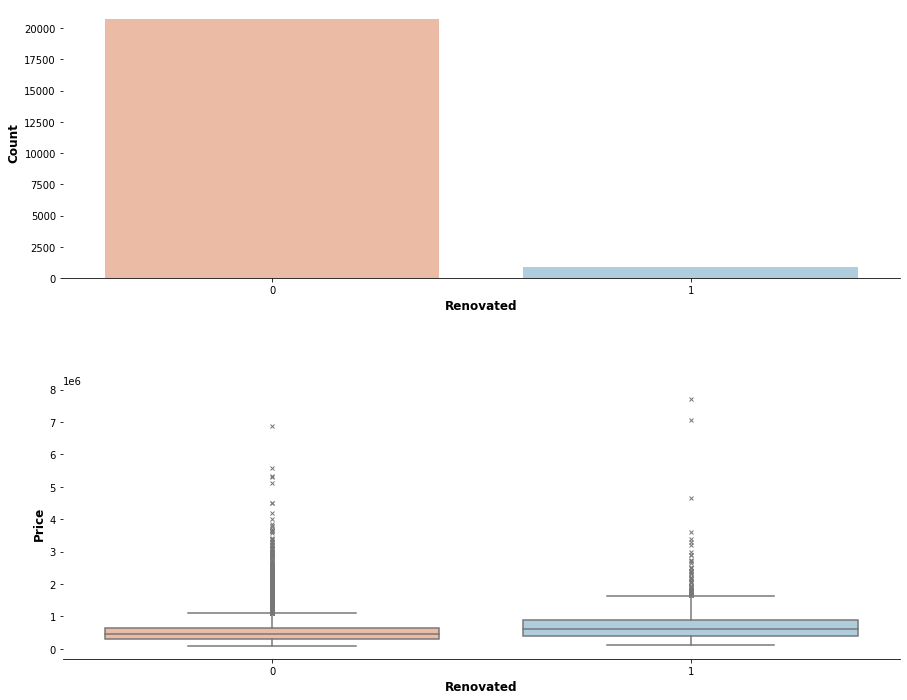

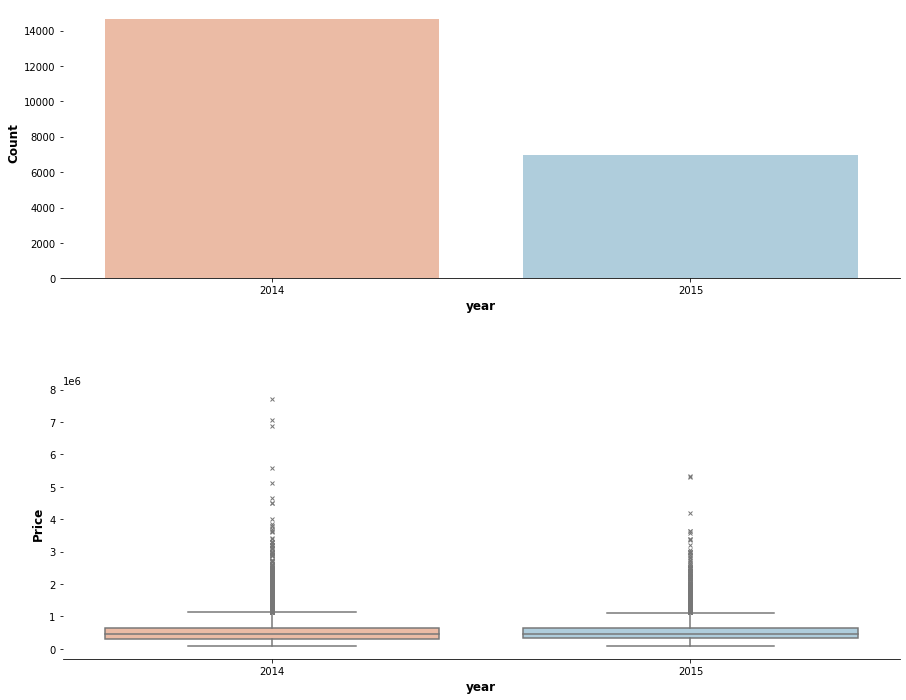

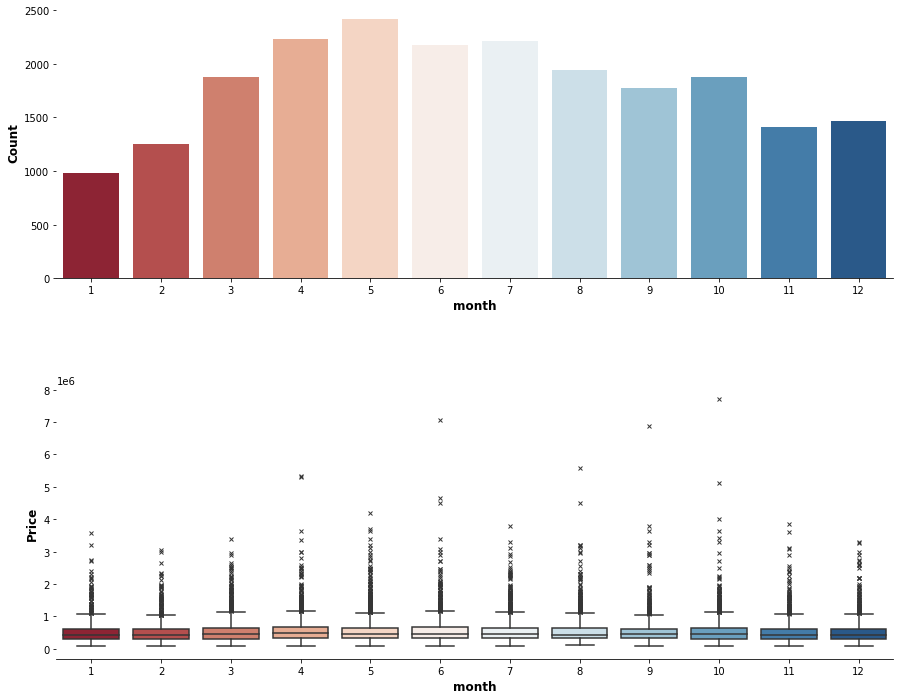

In [13]:
labels = ['Bedrooms','Bathrooms','Floors','Waterfront','View','Condition', 'Grade','Renovated','year','month']
labels2 = ['Square feet living','Square feet lot','Square feet above','Square feet basement','Year built', 'Square feet living 15', 'Square fee lot 15']

varc = ls_cont[:2] + ls_cont[4:9]+ls_cont[-3:]
for var,l in zip(varc,labels):
  fig, axes = plt.subplots(nrows=2, ncols=1, figsize = (15, 12))

  sns.countplot(ax=axes[0], x=var, data=df, palette='RdBu') 
  
  axes[0].spines['right'].set_visible(False)
  axes[0].spines['top'].set_visible(False)
  axes[0].spines['left'].set_visible(False)
  
  axes[0].set_xlabel(f"{l}",fontweight='bold', fontsize=12)
  axes[0].set_ylabel("Count", fontweight='bold', fontsize=12)


  sns.boxplot(ax=axes[1], data =df, x=var, y = target, order = sorted(df[var].unique()), palette ='RdBu',flierprops = dict(marker = "x", markersize = 3.5))

  axes[1].spines['right'].set_visible(False)
  axes[1].spines['top'].set_visible(False)
  axes[1].spines['left'].set_visible(False)

  axes[1].set_xlabel(f"{l}",fontweight='bold', fontsize=12)
  axes[1].set_ylabel("Price", fontweight='bold', fontsize=12)

  plt.subplots_adjust(wspace=0.4, hspace=0.4)
  plt.show()

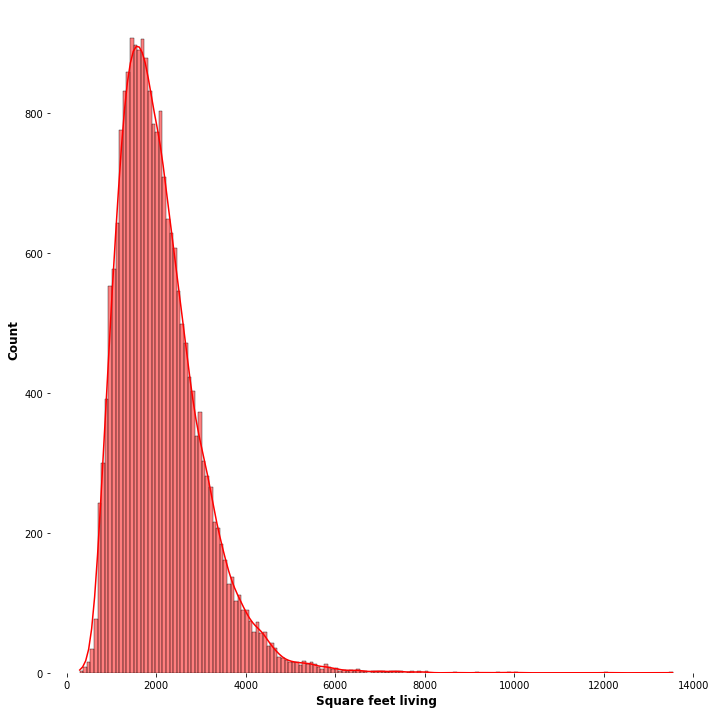

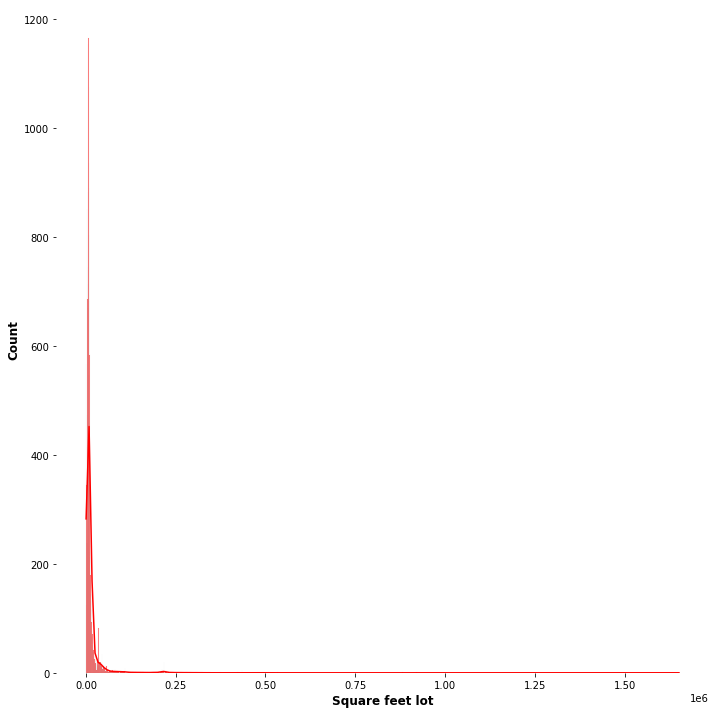

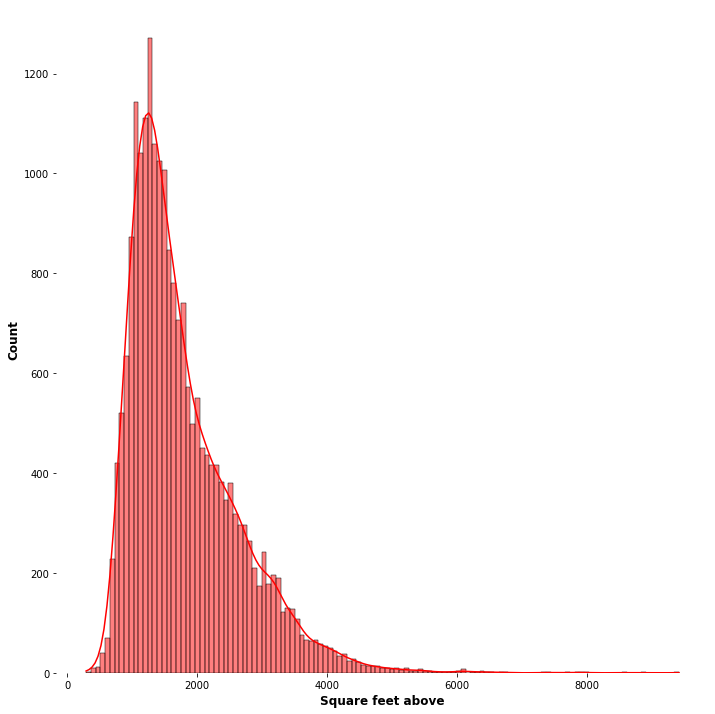

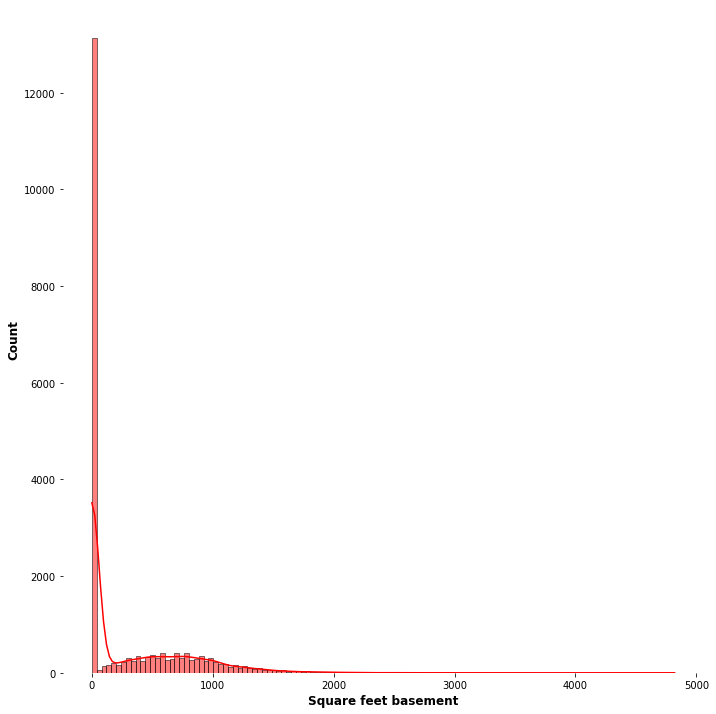

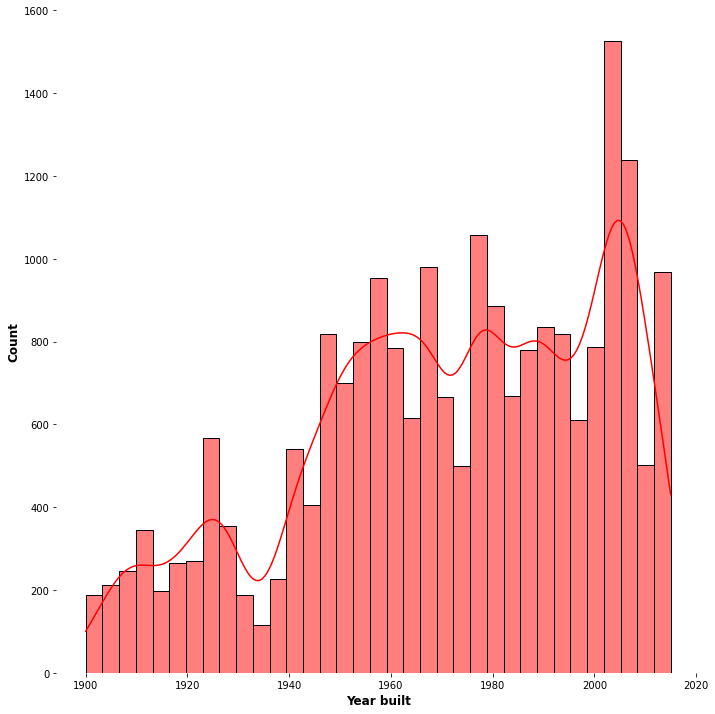

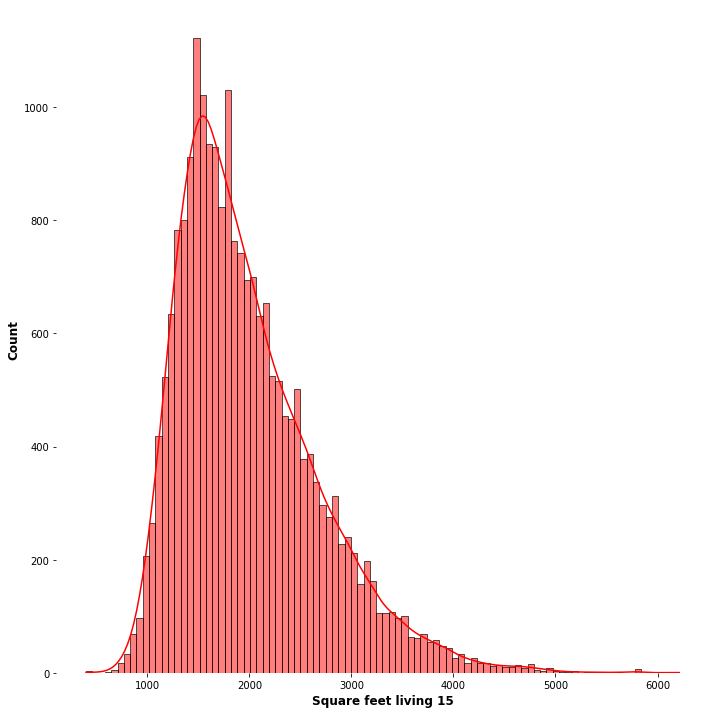

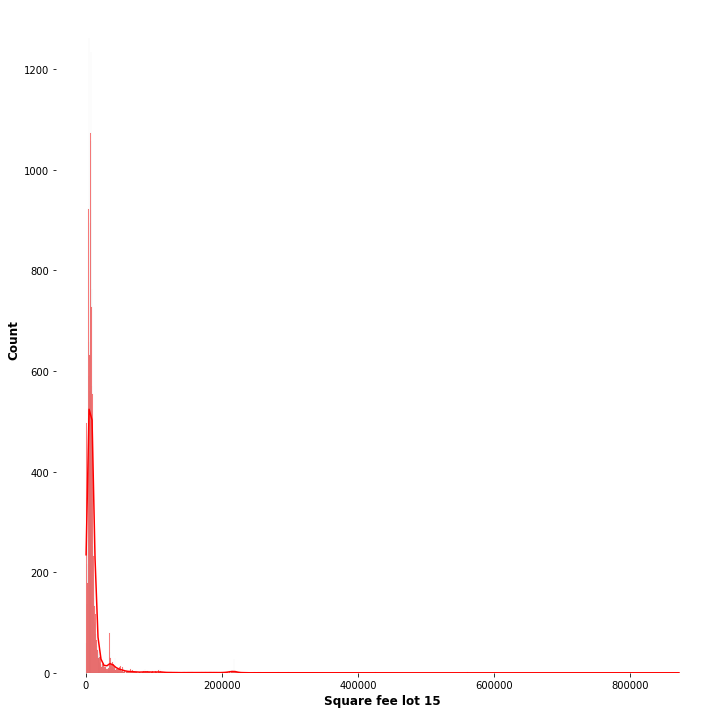

In [14]:
varc2 = ls_cont[2:4] + ls_cont[9:-1]
for var,l in zip(varc2,labels2):
  ax = sns.displot(data=df, x=var, kde=True, palette='RdBu',color='red',height=10)

  ax.despine(left=True, bottom=True)

  # Remove title
  plt.title("")
  # Set x-axis label
  plt.xlabel(f"{l}",fontweight='bold', fontsize=12)


  # Set y-axis label
  plt.ylabel("Count", fontweight='bold', fontsize=12)
  plt.show()

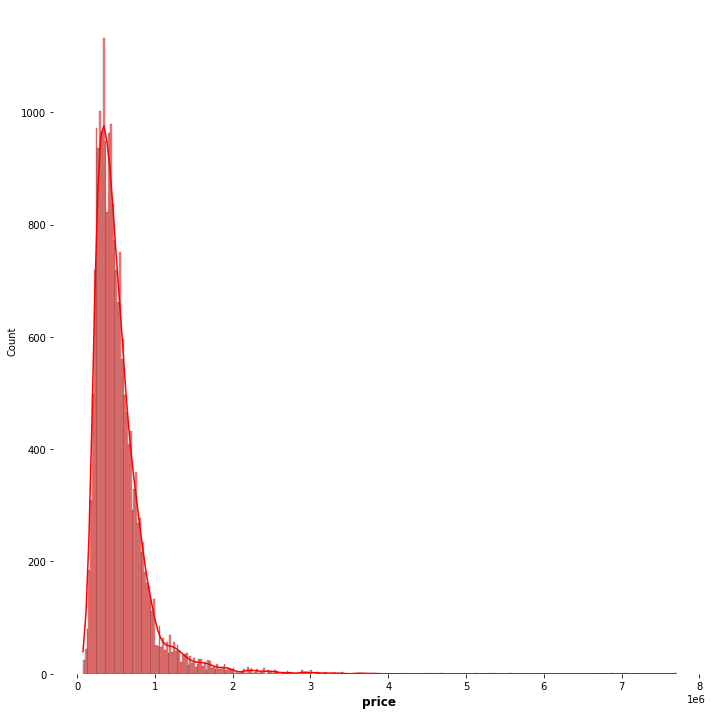

In [16]:
ax = sns.displot(data=df, x=target, kde=True, palette='RdBu',color='red',height=10)
ax.despine(left=True, bottom=True)
# Remove title
plt.title("")
# Set x-axis label
plt.xlabel(f"{target}",fontweight='bold', fontsize=12)
plt.show()

Realizamos diveras graficas para entender el comportamineto de nuestros datos, la fecuencia que tienen, como se encuentran distribuidos y que valores atipicos podriamsos llegar a tener.

- El en caso de los precios de los inmuebles los precios se encuentran en un rango de 100 000 a 300 000 mil pesos.
- Los inmuebles llegan a tener un area de contruccion debajo como un estacionamiento, este no sobrepasa delos 1500 pies cuadros. La gran mayoria no cuenta con esta seccióm
- La mayoria de los inmuebles cuenta con menos de 6 habitaciones y 3 baños. 

#### 2.- Limpie los datos y aplique las transformaciones que considere necesarias con el objetivo de mejorar el *Mean Squared Error (MSE)*. **(5 pts)**

- Revisamos si tenemos valores faltantes. En este caso nuestros datos estan completos.

In [17]:
def completitud(df):
    comp=pd.DataFrame(df.isnull().sum())
    comp.reset_index(inplace=True)
    comp=comp.rename(columns={"index":"columna",0:"total"})
    comp["completitud"]=(1-comp["total"]/df.shape[0])*100
    comp=comp.sort_values(by="completitud",ascending=True)
    comp.reset_index(drop=True,inplace=True)
    return comp

In [18]:
completitud(df)

,columna,total,completitud
0,id,0,100.00
1,renovated,0,100.00
2,sqft_lot15,0,100.00
3,sqft_living15,0,100.00
4,long,0,100.00
5,lat,0,100.00
6,zipcode,0,100.00
7,yr_renovated,0,100.00
8,yr_built,0,100.00
9,sqft_basement,0,100.00


In [19]:
df['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3048
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
0.50       4
5.75       4
6.75       2
8.00       2
6.25       2
6.50       2
7.50       1
7.75       1
Name: bathrooms, dtype: int64

Revisamos el numero de baños que tienen nuestros inmuebles. Notamos que 10 de estos no cuentan con ningun baño, lo cual es muy interesante ya que todas las propiedades ya se un local, oficinas, una constructora, al menos cuanta con un medio baño, por lo tanto se decicio eliminar estos registro.

Se reviso si eran terrenos sin construccion pero no  era el caso, todos tenian mas de 60% del avace de la contruccion.

In [22]:
df = df[df['bathrooms']>0]
df = df.reset_index(drop=True)

El registro con el numero de habitaciones igual a 33 es un error

- No tiene sentido que haya esa cantidad de cuartos y solo exista un baño y medio.
- Asi mismo el area construida es muy pequeña a comparacion de otras viviendas.
Si tuvueramos ese numero de cuartos, el tamaño de estos serian de 49ft. Lo cual es muy pequeño
- Tambien dice que estas recamaras estan distribuidas en un solo piso.


  - Ejemplo: Vivienda con 11 recamaras. 


| Bedroooms |Bathrooms| Floors|sqft_living|sqft_lot|
|----------|---------|--------|---------|---------|
|11|3|2|3000|49660|
|33|1.75|1|1620|6000| 


Por lo tanto si fue un error de captura el numero de cuartos al que haria alucion serian 3, lo cual concuerda con el area de contruccion, el numero de pisos, el numero de baños.

Entonces se decidio remplazar el dato por el correcto.


In [23]:
df['bedrooms'] = df['bedrooms'].replace(33,3)

In [27]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month
0,7129300520,2014-10-13,221900.00,3,1.00,1180,5650,1.00,0,0,3,7,1180,0,1955,0,98178,47.51,-122.26,1340,5650,0,2014,10
1,6414100192,2014-12-09,538000.00,3,2.25,2570,7242,2.00,0,0,3,7,2170,400,1951,1991,98125,47.72,-122.32,1690,7639,1,2014,12
2,5631500400,2015-02-25,180000.00,2,1.00,770,10000,1.00,0,0,3,6,770,0,1933,0,98028,47.74,-122.23,2720,8062,0,2015,2
3,2487200875,2014-12-09,604000.00,4,3.00,1960,5000,1.00,0,0,5,7,1050,910,1965,0,98136,47.52,-122.39,1360,5000,0,2014,12
4,1954400510,2015-02-18,510000.00,3,2.00,1680,8080,1.00,0,0,3,8,1680,0,1987,0,98074,47.62,-122.05,1800,7503,0,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21598,263000018,2014-05-21,360000.00,3,2.50,1530,1131,3.00,0,0,3,8,1530,0,2009,0,98103,47.70,-122.35,1530,1509,0,2014,5
21599,6600060120,2015-02-23,400000.00,4,2.50,2310,5813,2.00,0,0,3,8,2310,0,2014,0,98146,47.51,-122.36,1830,7200,0,2015,2
21600,1523300141,2014-06-23,402101.00,2,0.75,1020,1350,2.00,0,0,3,7,1020,0,2009,0,98144,47.59,-122.30,1020,2007,0,2014,6
21601,291310100,2015-01-16,400000.00,3,2.50,1600,2388,2.00,0,0,3,8,1600,0,2004,0,98027,47.53,-122.07,1410,1287,0,2015,1


Se reviso la correlacion que tienen nuestras vaiables.
- las vairables sqft avobe y living estan altemente relacionadas entre ellas, Las dos variables hacen referencia a el area contruida y hanitable de los inmuebles, algunos de estos registros son iguales.
- lo mismo sucede con las vaiables sqft  living,living15, lot, lot15
Eliminaremos las variables.



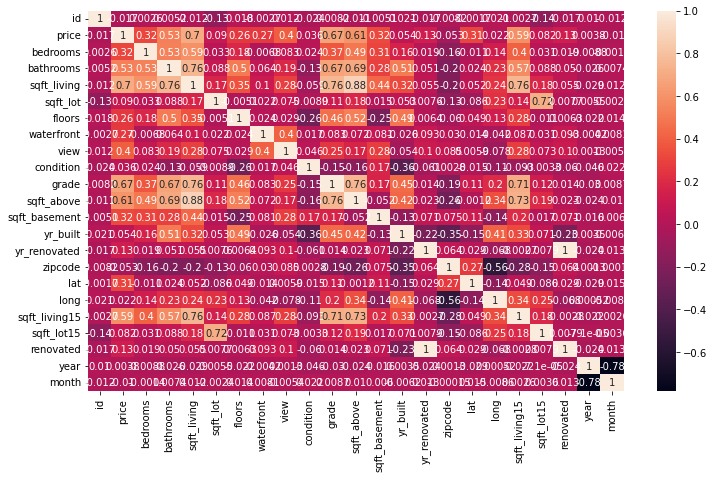

In [26]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(method='pearson'), annot=True);

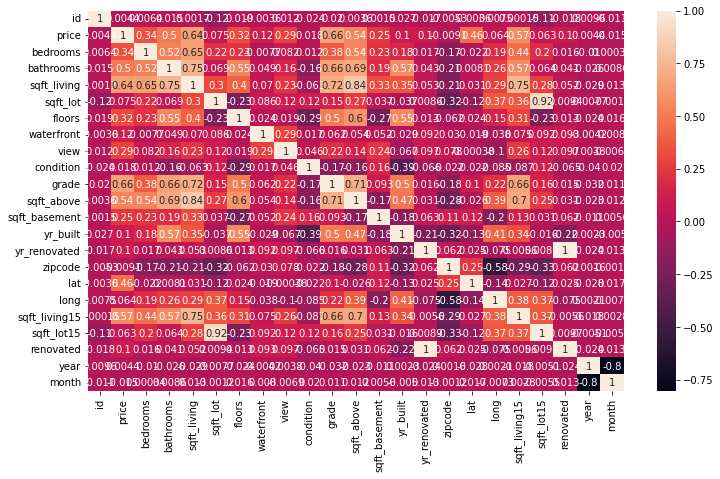

In [29]:
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(method='spearman'), annot=True);

In [30]:
columns = ['sqft_lot15','sqft_living15','date','yr_renovated','sqft_above']
df_ = df.drop(columns=columns)

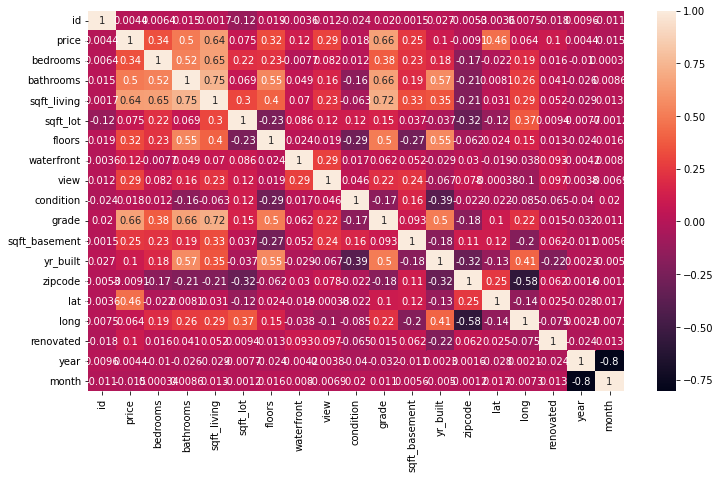

In [32]:
plt.figure(figsize=(12,7))
sns.heatmap(df_.corr(method='spearman'), annot=True);

In [34]:
column = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'renovated', 'year',
       'month']

REvisamos si las variables sobrantes se correlacionan mucho con la variable objetivo.

In [48]:
df_.corr()['price'].sort_values()

zipcode         -0.03
month           -0.02
id              -0.01
year             0.01
long             0.01
yr_built         0.03
condition        0.05
sqft_lot         0.09
renovated        0.13
waterfront       0.22
sqft_basement    0.24
floors           0.27
bedrooms         0.30
lat              0.36
view             0.36
bathrooms        0.47
sqft_living      0.65
grade            0.65
price            1.00
Name: price, dtype: float64

Algunas de nustras variables estan altamente correlacionadas con nuestra variable objetivo, pero tiene todo el sentido.
Ell precio de un imueble siempre depende del numero de cuartos, el area de contruccion y el tipo de inmueble. Si el inmuebles es un terreno con contruccion o no, si el inmueble esta en proceso de contruccion, o lo faltan algunos acabaados, y si el inmueble esta terminado y cuenta con muebles o no.

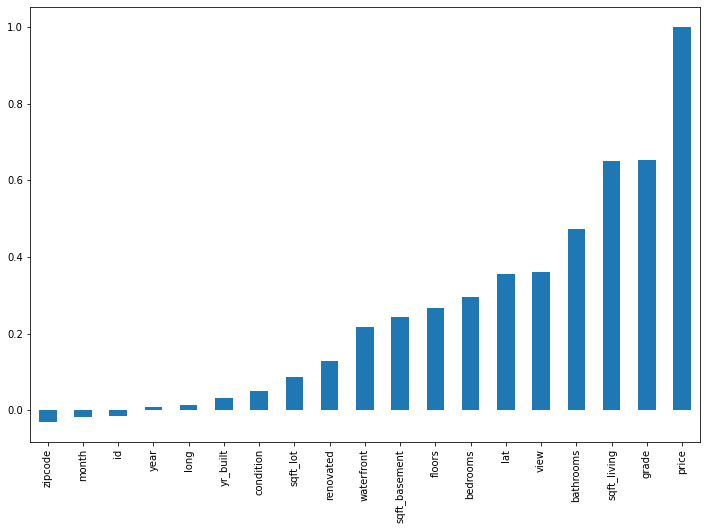

In [129]:
plt.figure(figsize=(12,8))
df_.corr()['price'].sort_values().plot(kind='bar');

### Outliers

In [38]:
df_.describe(percentiles=[0.2,0.05,0.5,0.75,0.95,0.99])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,renovated,year,month
count,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00,21603.00
mean,4580234406.67,540130.70,3.37,2.12,2080.10,15106.42,1.49,0.01,0.23,3.41,7.66,291.64,1971.01,98077.95,47.56,-122.21,0.04,2014.32,6.57
std,2876708745.84,367108.93,0.91,0.77,918.15,41429.13,0.54,0.09,0.77,0.65,1.17,442.63,29.37,53.51,0.14,0.14,0.20,0.47,3.12
min,1000102.00,78000.00,0.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,0.00,1900.00,98001.00,47.16,-122.52,0.00,2014.00,1.00
5%,513000455.50,210000.00,2.00,1.00,940.00,1800.10,1.00,0.00,0.00,3.00,6.00,0.00,1915.00,98004.00,47.31,-122.39,0.00,2014.00,2.00
20%,1774000182.00,298740.00,3.00,1.50,1320.00,4644.00,1.00,0.00,0.00,3.00,7.00,0.00,1947.00,98028.00,47.43,-122.35,0.00,2014.00,4.00
50%,3904930240.00,450000.00,3.00,2.25,1910.00,7617.00,1.50,0.00,0.00,3.00,7.00,0.00,1975.00,98065.00,47.57,-122.23,0.00,2014.00,6.00
75%,7308900467.50,645000.00,4.00,2.50,2550.00,10684.50,2.00,0.00,0.00,4.00,8.00,560.00,1997.00,98118.00,47.68,-122.12,0.00,2015.00,9.00
95%,9297300381.00,1155900.00,5.00,3.50,3760.00,43328.90,2.00,0.00,2.00,5.00,10.00,1190.00,2011.00,98177.00,47.75,-121.98,0.00,2015.00,12.00
99%,9558788028.70,1964900.00,6.00,4.25,4979.80,213008.00,3.00,0.00,4.00,5.00,11.00,1660.00,2014.00,98199.00,47.77,-121.78,1.00,2015.00,12.00


Como vimos en las graficas tenemos variables con valores atipicos como el numero de cuartos, el numero de baños, el area de construccion hacia abajo, entre otros, Es por eso que nos quedaremos con los valores que tienen el 99% de nuestros datos 

In [39]:
vars=['sqft_basement','bedrooms','bathrooms','sqft_living','sqft_lot']
dc_perc = {feature: df_[feature].quantile(0.99) for feature in vars}

In [40]:
dc_perc

{'bathrooms': 4.25,
 'bedrooms': 6.0,
 'sqft_basement': 1660.0,
 'sqft_living': 4979.799999999996,
 'sqft_lot': 213008.0}

In [41]:
dc_perc.items()

dict_items([('sqft_basement', 1660.0), ('bedrooms', 6.0), ('bathrooms', 4.25), ('sqft_living', 4979.799999999996), ('sqft_lot', 213008.0)])

In [43]:
for feat, perc in dc_perc.items():
    df_ = df_[(df_[feat] <= perc) | (df_[feat].isna())]

In [44]:
df_.shape[0]/df.shape[0]

0.968106281534972

In [47]:
df_.describe(percentiles=[0.01,0.50,0.75,0.99])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_basement,yr_built,zipcode,lat,long,renovated,year,month
count,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00,20914.00
mean,4612952365.65,516406.94,3.33,2.07,2011.23,11744.71,1.49,0.01,0.21,3.41,7.60,270.42,1970.66,98078.68,47.56,-122.22,0.04,2014.32,6.57
std,2876066705.08,302222.82,0.86,0.71,798.77,19104.17,0.54,0.08,0.72,0.65,1.11,403.20,29.42,53.53,0.14,0.14,0.20,0.47,3.11
min,1000102.00,78000.00,0.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,0.00,1900.00,98001.00,47.16,-122.51,0.00,2014.00,1.00
1%,123005182.34,153000.00,2.00,1.00,720.00,1007.39,1.00,0.00,0.00,3.00,5.00,0.00,1904.00,98001.00,47.26,-122.41,0.00,2014.00,1.00
50%,3956000480.00,445000.00,3.00,2.25,1880.00,7500.00,1.50,0.00,0.00,3.00,7.00,0.00,1974.00,98070.00,47.57,-122.23,0.00,2014.00,6.00
75%,7338220260.00,625651.00,4.00,2.50,2490.00,10300.00,2.00,0.00,0.00,4.00,8.00,530.00,1996.00,98118.00,47.68,-122.13,0.00,2015.00,9.00
99%,9558887012.60,1694480.00,5.00,3.75,4308.70,105850.00,3.00,0.00,4.00,5.00,11.00,1430.00,2014.00,98199.00,47.77,-121.79,1.00,2015.00,12.00
max,9900000190.00,3640900.00,6.00,4.25,4970.00,213008.00,3.50,1.00,4.00,5.00,13.00,1660.00,2015.00,98199.00,47.78,-121.31,1.00,2015.00,12.00


In [70]:
df_ = df_.reset_index(drop=True)

#### 3.- Defina una arquitectura basada en redes neuronales artificiales con el uso de TF2. **(5pts)**

### Preprocesamiento

In [49]:
from sklearn.model_selection import train_test_split

In [71]:
X = df_.drop(['price','id'],axis=1).values
y = df_['price'].values

Elegimos un porcentaje de nuestros datos y los separamos en un conjuno de entrenamiento y un conjunto de validacion.
Eleji 30% de nuestros datos como conjunto de validación.

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14639, 17), (6275, 17), (14639,), (6275,))

Escalamos nuetros datos para tener todos nuetros datos en la misma escala

In [75]:
from sklearn.preprocessing import MinMaxScaler

In [76]:
scaler = MinMaxScaler()

In [77]:
X_train = scaler.fit_transform(X_train)

In [78]:
X_test = scaler.transform(X_test)

#### 4.- Entrene, optimice y evalúe el modelo diagnosticando si se encuentra sobreajustado y en caso de resultar positivo implemente regularización. **(5pts)**

# Modelación

In [79]:
import tensorflow as tf

device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [80]:
tf.__version__

'2.8.0'

In [61]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense

## Modelo 1

- Para nuestro primer modelo decidi utilizar como primera capa oculta el numero de variables que tenemos que son 17 y de ahi agregar capas con menor densidad. 
- La funcion de activacion fue Relu.
- Como funcion de perdida mse
- Como optimizador RMSprop

---



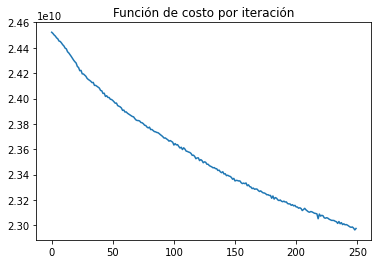

Elegimos realizar 1000 Epoch ya que en la imagen de arriba fue con  600 y aun no se puede apreciar un punto de convergencia.

In [81]:
model = Sequential()

model.add(Dense(17, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [292]:
%%time
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), verbose=1)

Epoch 1/1000
458/458 [==============================] - 2s 4ms/step - loss: 21592242176.0000 - val_loss: 21141780480.0000
Epoch 2/1000
458/458 [==============================] - 2s 4ms/step - loss: 21557053440.0000 - val_loss: 21175967744.0000
Epoch 3/1000
458/458 [==============================] - 2s 4ms/step - loss: 21562013696.0000 - val_loss: 21214468096.0000
Epoch 4/1000
458/458 [==============================] - 2s 4ms/step - loss: 21527277568.0000 - val_loss: 21393141760.0000
Epoch 5/1000
458/458 [==============================] - 2s 4ms/step - loss: 21522216960.0000 - val_loss: 21099941888.0000
Epoch 6/1000
458/458 [==============================] - 2s 4ms/step - loss: 21490206720.0000 - val_loss: 21291560960.0000
Epoch 7/1000
458/458 [==============================] - 2s 4ms/step - loss: 21497378816.0000 - val_loss: 21044379648.0000
Epoch 8/1000
458/458 [==============================] - 2s 4ms/step - loss: 21480294400.0000 - val_loss: 21008240640.0000
Epoch 9/1000
458/458 [==

In [294]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 120)               2160      
                                                                 
 dense_18 (Dense)            (None, 60)                7260      
                                                                 
 dense_19 (Dense)            (None, 30)                1830      
                                                                 
 dense_20 (Dense)            (None, 15)                465       
                                                                 
 dense_21 (Dense)            (None, 1)                 16        
                                                                 
 dropout_3 (Dropout)         (None, 1)                 0         
                                                                 
Total params: 11,731
Trainable params: 11,731
Non-trai

In [295]:
model.save('/content/drive/MyDrive/MODULO4/PRACTICA1/models/modelo_1.h5')

#### Evaluación

In [296]:
loss = model.history.history['loss']

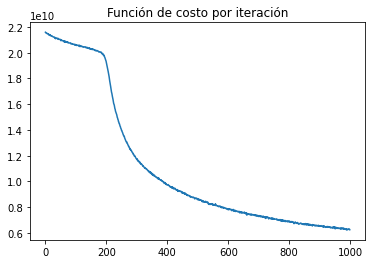

In [297]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Función de costo por iteración");

In [298]:
model_loss = pd.DataFrame(model.history.history)

In [299]:
model_loss.head()

,loss,val_loss
0,21592242176.00,21141780480.00
1,21557053440.00,21175967744.00
2,21562013696.00,21214468096.00
3,21527277568.00,21393141760.00
4,21522216960.00,21099941888.00


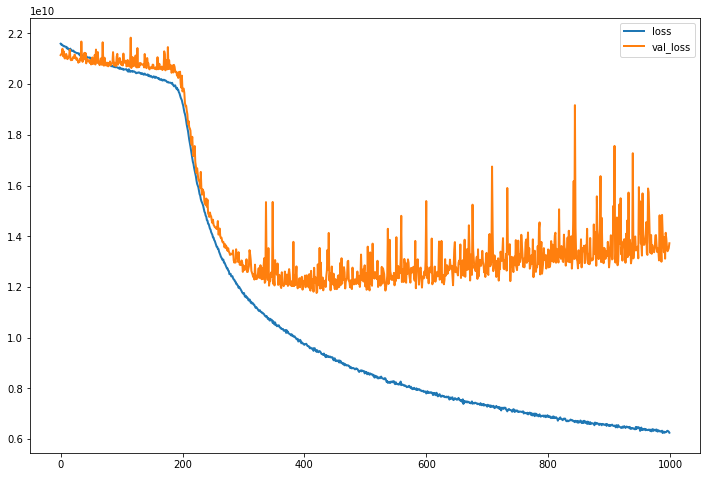

In [300]:
model_loss.plot(figsize=(12,8), linewidth=2);

Podemos ver que tenemos sobreajuste

### Regularización: Early Stopping

In [119]:
from tensorflow.keras.callbacks import EarlyStopping

In [301]:
model = Sequential()

model.add(Dense(17, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(4, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='rmsprop', loss='mse')

In [302]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
%%time
model.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/250
458/458 [==============================] - 3s 4ms/step - loss: 363130388480.0000 - val_loss: 345947406336.0000
Epoch 2/250
458/458 [==============================] - 2s 3ms/step - loss: 362882596864.0000 - val_loss: 345441992704.0000
Epoch 3/250
458/458 [==============================] - 2s 3ms/step - loss: 361857384448.0000 - val_loss: 343770791936.0000
Epoch 4/250
458/458 [==============================] - 2s 3ms/step - loss: 359113654272.0000 - val_loss: 339871268864.0000
Epoch 5/250
458/458 [==============================] - 2s 3ms/step - loss: 353438138368.0000 - val_loss: 332386336768.0000
Epoch 6/250
458/458 [==============================] - 2s 3ms/step - loss: 343328227328.0000 - val_loss: 319776391168.0000
Epoch 7/250
458/458 [==============================] - 2s 3ms/step - loss: 327221346304.0000 - val_loss: 300439044096.0000
Epoch 8/250
458/458 [==============================] - 2s 3ms/step - loss: 303392391168.0000 - val_loss: 273161437184.0000
Epoch 9/250
458/

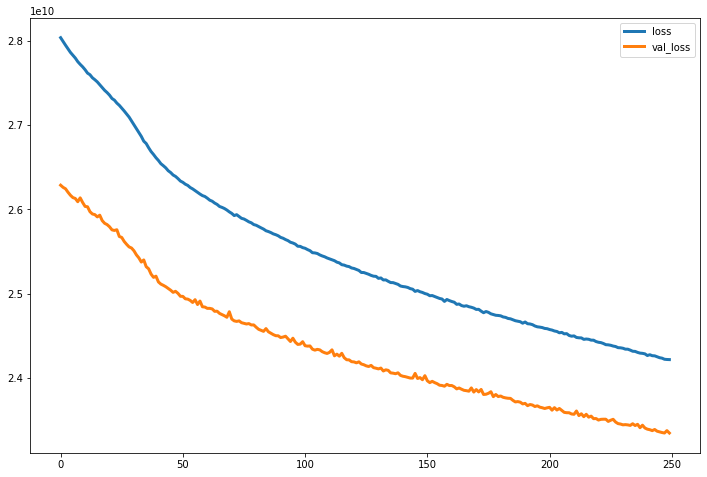

In [124]:
model_loss_es = pd.DataFrame(model_es.history.history)
model_loss_es.plot(figsize=(12,8), linewidth=2);

### 3. Regularización: Dropout

In [125]:
from tensorflow.keras.layers import Dropout

In [126]:
model_do = Sequential()

# Hidden layer 1
model_do.add(Dense(units=17, activation='relu'))
model_do.add(Dropout(0.5))

# Hidden layer 2
model_do.add(Dense(units=8, activation='relu'))
model_do.add(Dropout(0.5))

# Hidden layer 3
model_do.add(Dense(units=4, activation='relu'))
model_do.add(Dropout(0.5))

# Output layer
model_do.add(Dense(units=1, activation='sigmoid'))
model_do.compile(optimizer='rmsprop', loss='mse')

In [127]:
%%time
model_do.fit(x=X_train, y=y_train, epochs=250, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop])

Epoch 1/250
458/458 [==============================] - 2s 4ms/step - loss: 363149754368.0000 - val_loss: 346017628160.0000
Epoch 2/250
458/458 [==============================] - 2s 4ms/step - loss: 363149754368.0000 - val_loss: 346017628160.0000
Epoch 3/250
458/458 [==============================] - 2s 4ms/step - loss: 363149557760.0000 - val_loss: 346017628160.0000
Epoch 4/250
458/458 [==============================] - 2s 4ms/step - loss: 363149721600.0000 - val_loss: 346017628160.0000
Epoch 5/250
458/458 [==============================] - 2s 4ms/step - loss: 363149688832.0000 - val_loss: 346017628160.0000
Epoch 6/250
458/458 [==============================] - 2s 4ms/step - loss: 363149721600.0000 - val_loss: 346017628160.0000
Epoch 7/250
458/458 [==============================] - 2s 4ms/step - loss: 363149688832.0000 - val_loss: 346017628160.0000
Epoch 8/250
458/458 [==============================] - 2s 4ms/step - loss: 363149852672.0000 - val_loss: 346017628160.0000
Epoch 9/250
458/

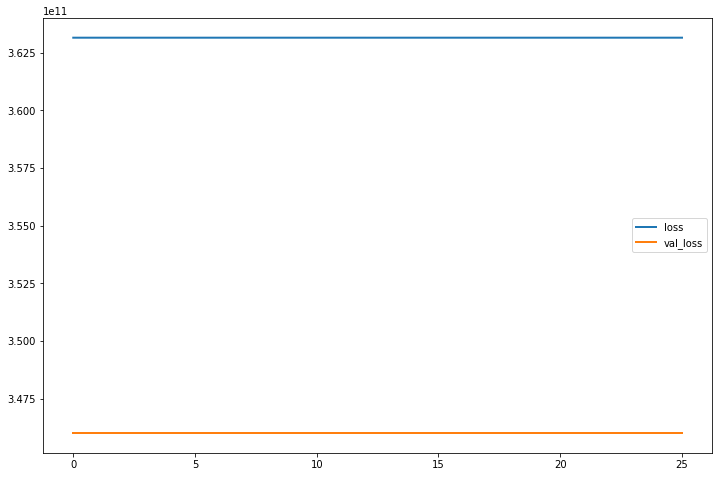

In [128]:
model_loss_do = pd.DataFrame(model_do.history.history)
model_loss_do.plot(figsize=(12,8), linewidth=2);

# Modelo 2

In [136]:
model_ = Sequential()

model_.add(Dense(120, activation='relu'))
model_.add(Dense(60, activation='relu'))
model_.add(Dense(30, activation='relu'))
model_.add(Dense(15, activation='relu'))
model_.add(Dense(1))

model_.compile(optimizer='rmsprop', loss='mse')

In [144]:
model_.fit(x=X_train, y=y_train, epochs=150, batch_size=64,validation_data=(X_test, y_test), verbose=1)

Epoch 1/150
229/229 [==============================] - 2s 5ms/step - loss: 360512978944.0000 - val_loss: 334443675648.0000
Epoch 2/150
229/229 [==============================] - 1s 4ms/step - loss: 302896709632.0000 - val_loss: 205485080576.0000
Epoch 3/150
229/229 [==============================] - 1s 4ms/step - loss: 117190402048.0000 - val_loss: 62839709696.0000
Epoch 4/150
229/229 [==============================] - 1s 4ms/step - loss: 67188011008.0000 - val_loss: 58668060672.0000
Epoch 5/150
229/229 [==============================] - 1s 4ms/step - loss: 63310614528.0000 - val_loss: 55175163904.0000
Epoch 6/150
229/229 [==============================] - 1s 4ms/step - loss: 59304357888.0000 - val_loss: 51410096128.0000
Epoch 7/150
229/229 [==============================] - 1s 4ms/step - loss: 55259455488.0000 - val_loss: 47717892096.0000
Epoch 8/150
229/229 [==============================] - 1s 4ms/step - loss: 51010445312.0000 - val_loss: 44478853120.0000
Epoch 9/150
229/229 [======

In [145]:
model_.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_22 (Dense)            (None, 120)               2160      
                                                                 
 dense_23 (Dense)            (None, 60)                7260      
                                                                 
 dense_24 (Dense)            (None, 30)                1830      
                                                                 
 dense_25 (Dense)            (None, 15)                465       
                                                                 
 dense_26 (Dense)            (None, 1)                 16        
                                                                 
Total params: 11,731
Trainable params: 11,731
Non-trainable params: 0
_________________________________________________________________


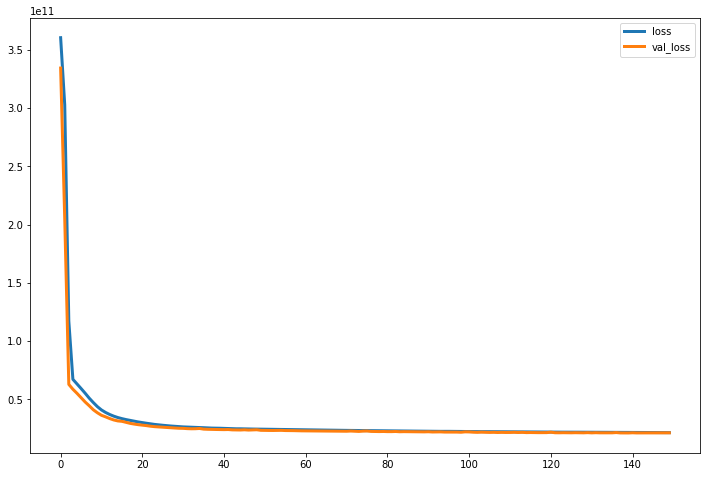

In [147]:
model_loss_ = pd.DataFrame(model_.history.history)
model_loss_.plot(figsize=(12,8), linewidth=3);

### Análisis de resultados

In [168]:
test_predictions = model_.predict(X_test)

In [169]:
test_predictions.shape

(6275, 1)

In [170]:
pred_df = pd.DataFrame(y_test, columns=['y_test'])

In [171]:
pred_df

,y_test
0,739999.00
1,545000.00
2,312000.00
3,250000.00
4,605000.00
...,...
6270,459500.00
6271,569900.00
6272,545800.00
6273,380000.00


In [172]:
test_predictions = pd.Series(test_predictions.reshape(6275,))

In [173]:
test_predictions.shape

(6275,)

In [174]:
pred_df = pd.concat([pred_df,test_predictions], axis=1)

In [175]:
pred_df.columns = ['Real','Predicho']

In [176]:
pred_df

,Real,Predicho
0,739999.00,844491.69
1,545000.00,458430.81
2,312000.00,290774.47
3,250000.00,261199.11
4,605000.00,602286.62
...,...,...
6270,459500.00,379532.31
6271,569900.00,480895.22
6272,545800.00,494862.62
6273,380000.00,368481.84


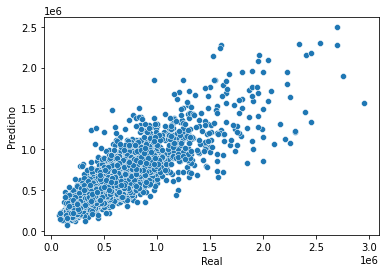

In [177]:
sns.scatterplot(x='Real', y='Predicho', data=pred_df);

In [178]:
pred_df['Error'] = pred_df['Real'] - pred_df['Predicho']

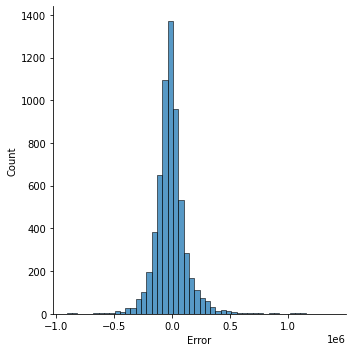

In [179]:
sns.displot(pred_df['Error'], bins=50);

In [180]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [181]:
mean_absolute_error(pred_df['Real'], pred_df['Predicho'])

96004.21468002988

In [182]:
mean_squared_error(pred_df['Real'], pred_df['Predicho'])

21255352624.56807

In [183]:
test_score

22395856896.0

In [184]:
# RMSE
test_score**0.5

149652.45369187903

In [ ]:
344975657397>29587429979

True

# Modelo 3

In [149]:
modelo = Sequential()

# Hidden layer
modelo.add(Dense(18,  activation='relu'))

# Hidden layer
modelo.add(Dense(9, activation='relu'))
# Output layer
modelo.add(Dense(units=1,activation='sigmoid'))

# Compile model
modelo.compile(optimizer='rmsprop', loss='mse')

In [150]:
%%time
modelo.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), verbose=1)

Epoch 1/300
229/229 [==============================] - 1s 4ms/step - loss: 363149721600.0000 - val_loss: 346017529856.0000
Epoch 2/300
229/229 [==============================] - 1s 3ms/step - loss: 363149623296.0000 - val_loss: 346017529856.0000
Epoch 3/300
229/229 [==============================] - 1s 3ms/step - loss: 363149623296.0000 - val_loss: 346017529856.0000
Epoch 4/300
229/229 [==============================] - 1s 3ms/step - loss: 363149688832.0000 - val_loss: 346017529856.0000
Epoch 5/300
229/229 [==============================] - 1s 3ms/step - loss: 363149688832.0000 - val_loss: 346017529856.0000
Epoch 6/300
229/229 [==============================] - 1s 3ms/step - loss: 363149688832.0000 - val_loss: 346017529856.0000
Epoch 7/300
229/229 [==============================] - 1s 3ms/step - loss: 363149557760.0000 - val_loss: 346017529856.0000
Epoch 8/300
229/229 [==============================] - 1s 3ms/step - loss: 363149557760.0000 - val_loss: 346017529856.0000
Epoch 9/300
229/

In [151]:
modelo.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 18)                324       
                                                                 
 dense_31 (Dense)            (None, 9)                 171       
                                                                 
 dense_32 (Dense)            (None, 1)                 10        
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [152]:
modelo.history.history.keys()

dict_keys(['loss', 'val_loss'])

In [153]:
loss = modelo.history.history['loss']

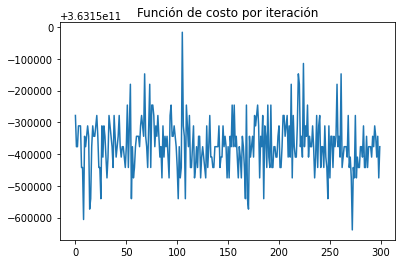

In [157]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Función de costo por iteración");

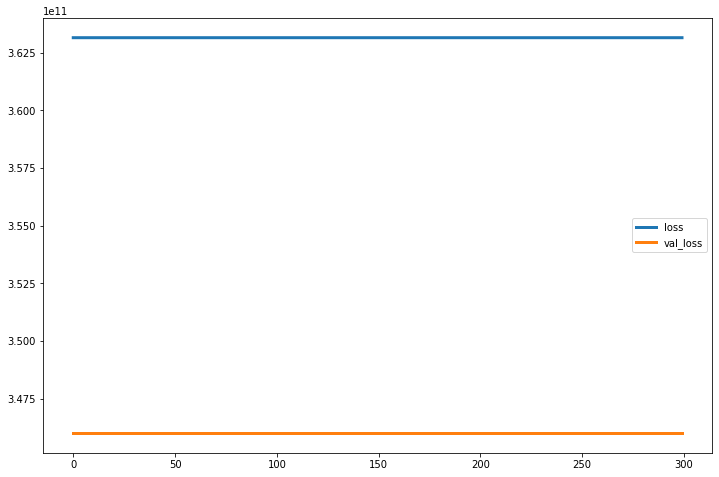

In [159]:
modelo_loss = pd.DataFrame(modelo.history.history)
modelo_loss.plot(figsize=(12,8), linewidth=3);

## Regularización: Early Stopping

In [162]:
modelo_es = Sequential()

# Hidden layer
modelo_es.add(Dense(18,  activation='relu'))

# Hidden layer
modelo_es.add(Dense(9, activation='relu'))
# Output layer
modelo.add(Dense(units=1,activation='sigmoid'))

# Compile model
modelo_es.compile(optimizer='rmsprop', loss='mse')

In [163]:
%%time
modelo_es.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop] )

Epoch 1/300
229/229 [==============================] - 2s 6ms/step - loss: 363148050432.0000 - val_loss: 346011533312.0000
Epoch 2/300
229/229 [==============================] - 1s 5ms/step - loss: 363134943232.0000 - val_loss: 345992593408.0000
Epoch 3/300
229/229 [==============================] - 1s 5ms/step - loss: 363109580800.0000 - val_loss: 345961725952.0000
Epoch 4/300
229/229 [==============================] - 1s 4ms/step - loss: 363071602688.0000 - val_loss: 345918210048.0000
Epoch 5/300
229/229 [==============================] - 1s 5ms/step - loss: 363020943360.0000 - val_loss: 345861980160.0000
Epoch 6/300
229/229 [==============================] - 1s 3ms/step - loss: 362956947456.0000 - val_loss: 345792872448.0000
Epoch 7/300
229/229 [==============================] - 1s 3ms/step - loss: 362880237568.0000 - val_loss: 345711443968.0000
Epoch 8/300
229/229 [==============================] - 1s 3ms/step - loss: 362790420480.0000 - val_loss: 345617104896.0000
Epoch 9/300
229/

In [164]:
modelo_es.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 18)                324       
                                                                 
 dense_37 (Dense)            (None, 9)                 171       
                                                                 
Total params: 495
Trainable params: 495
Non-trainable params: 0
_________________________________________________________________


In [165]:
loss = modelo_es.history.history['loss']

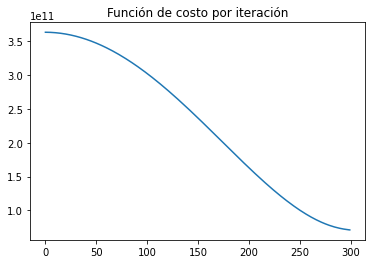

In [166]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Función de costo por iteración");

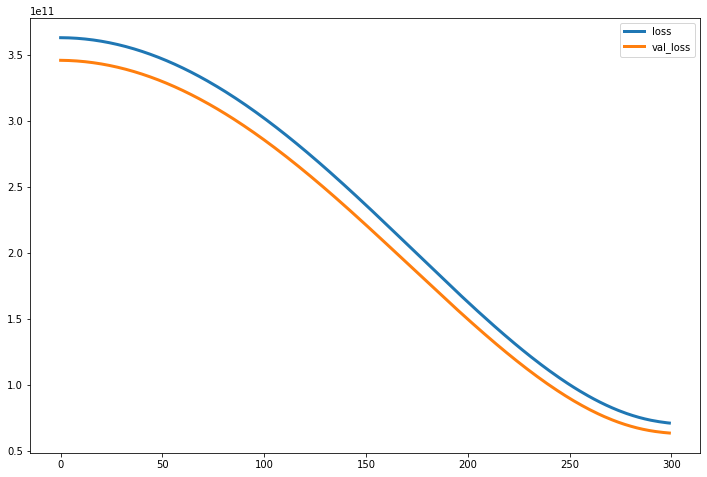

In [167]:
modelo_es_loss = pd.DataFrame(modelo_es.history.history)
modelo_es_loss.plot(figsize=(12,8), linewidth=3);

In [186]:
modelo_do = Sequential()

# Hidden layer 1
modelo_do.add(Dense(units=18, activation='relu'))
modelo.add(Dropout(0.5))

# Hidden layer 2
modelo_do.add(Dense(units=9, activation='relu'))
modelo_do.add(Dropout(0.5))

# Output layer
modelo_do.add(Dense(units=1, activation='sigmoid'))
modelo_do.compile(optimizer='rmsprop', loss='mse')

In [187]:
%%time
modelo_do.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), verbose=1, callbacks=[early_stop] )

Epoch 1/300
229/229 [==============================] - 2s 7ms/step - loss: 363149623296.0000 - val_loss: 346017529856.0000
Epoch 2/300
229/229 [==============================] - 2s 7ms/step - loss: 363149754368.0000 - val_loss: 346017529856.0000
Epoch 3/300
229/229 [==============================] - 1s 6ms/step - loss: 363149524992.0000 - val_loss: 346017529856.0000
Epoch 4/300
229/229 [==============================] - 1s 6ms/step - loss: 363149852672.0000 - val_loss: 346017529856.0000
Epoch 5/300
229/229 [==============================] - 1s 6ms/step - loss: 363149557760.0000 - val_loss: 346017529856.0000
Epoch 6/300
229/229 [==============================] - 1s 6ms/step - loss: 363149656064.0000 - val_loss: 346017529856.0000
Epoch 7/300
229/229 [==============================] - 2s 7ms/step - loss: 363149688832.0000 - val_loss: 346017529856.0000
Epoch 8/300
229/229 [==============================] - 2s 7ms/step - loss: 363149426688.0000 - val_loss: 346017529856.0000
Epoch 9/300
229/

In [188]:
modelo_do.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_40 (Dense)            (None, 18)                324       
                                                                 
 dense_41 (Dense)            (None, 9)                 171       
                                                                 
 dropout_5 (Dropout)         (None, 9)                 0         
                                                                 
 dense_42 (Dense)            (None, 1)                 10        
                                                                 
Total params: 505
Trainable params: 505
Non-trainable params: 0
_________________________________________________________________


In [189]:
loss = modelo_do.history.history['loss']

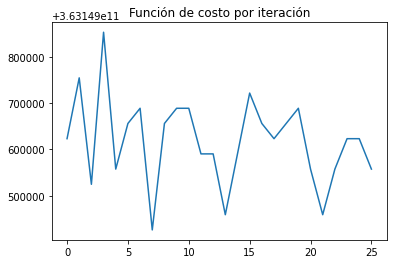

In [190]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Función de costo por iteración");

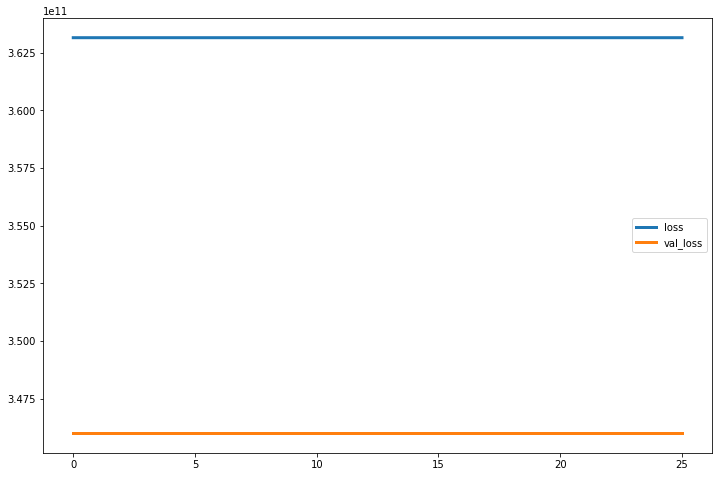

In [191]:
modelo_loss_do = pd.DataFrame(modelo_do.history.history)
modelo_loss_do.plot(figsize=(12,8), linewidth=3);

In [192]:
training_score = modelo.evaluate(X_train,y_train,verbose=0)
test_score = modelo.evaluate(X_test,y_test,verbose=0)

In [193]:
training_score

363149524992.0

In [194]:
test_score

346017628160.0

### Análisis de resultados

In [195]:
test_predictions = modelo.predict(X_test)

In [196]:
test_predictions.shape

(6275, 1)

In [197]:
pred_df = pd.DataFrame(y_test, columns=['y_test'])

In [198]:
pred_df

,y_test
0,739999.00
1,545000.00
2,312000.00
3,250000.00
4,605000.00
...,...
6270,459500.00
6271,569900.00
6272,545800.00
6273,380000.00


In [199]:
test_predictions = pd.Series(test_predictions.reshape(6275,))

In [200]:
test_predictions.shape

(6275,)

In [201]:
pred_df = pd.concat([pred_df,test_predictions], axis=1)

In [202]:
pred_df.columns = ['Real','Predicho']

In [203]:
pred_df

,Real,Predicho
0,739999.00,0.18
1,545000.00,0.18
2,312000.00,0.18
3,250000.00,0.18
4,605000.00,0.18
...,...,...
6270,459500.00,0.18
6271,569900.00,0.18
6272,545800.00,0.18
6273,380000.00,0.18


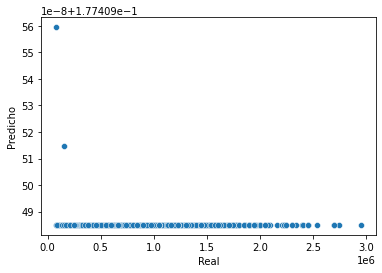

In [204]:
sns.scatterplot(x='Real', y='Predicho', data=pred_df);

In [205]:
pred_df['Error'] = pred_df['Real'] - pred_df['Predicho']

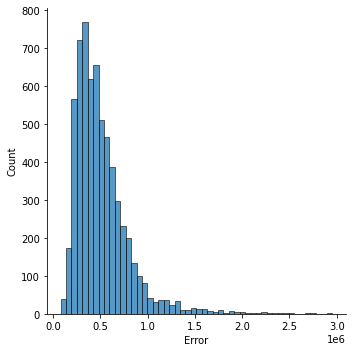

In [206]:
sns.displot(pred_df['Error'], bins=50);

In [207]:
mean_absolute_error(pred_df['Real'], pred_df['Predicho'])

510477.2023514712

In [208]:
mean_squared_error(pred_df['Real'], pred_df['Predicho'])

346018414886.64954

In [209]:
test_score

346017628160.0

In [210]:
# RMSE
test_score**0.5

588232.6309887951

In [211]:
training_score = modelo_es.evaluate(X_train,y_train,verbose=0)
test_score = modelo_es.evaluate(X_test,y_test,verbose=0)

In [212]:
training_score

71197130752.0

In [213]:
test_score

63727009792.0

### Análisis de resultados

In [232]:
test_prediction = modelo_es.predict(X_test)

In [241]:
p = pd.DataFrame(test_prediction)

In [248]:
p = p[[0]]

In [251]:
test_predictions = p.to_numpy()

In [252]:
test_predictions.shape

(6275, 1)

In [253]:
pred_df = pd.DataFrame(y_test, columns=['y_test'])

In [254]:
pred_df

,y_test
0,739999.00
1,545000.00
2,312000.00
3,250000.00
4,605000.00
...,...
6270,459500.00
6271,569900.00
6272,545800.00
6273,380000.00


In [255]:
test_predictions = pd.Series(test_predictions.reshape(6275,))

In [256]:
test_predictions.shape

(6275,)

In [257]:
pred_df = pd.concat([pred_df,test_predictions], axis=1)

In [258]:
pred_df.columns = ['Real','Predicho']

In [259]:
pred_df

,Real,Predicho
0,739999.00,614523.69
1,545000.00,527188.62
2,312000.00,472611.75
3,250000.00,395465.88
4,605000.00,593084.75
...,...,...
6270,459500.00,492515.69
6271,569900.00,588538.56
6272,545800.00,497341.78
6273,380000.00,421589.56


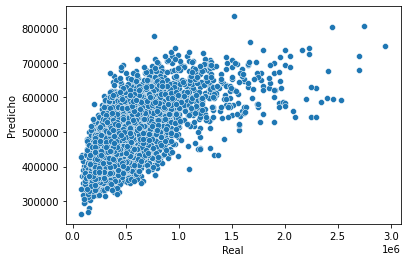

In [260]:
sns.scatterplot(x='Real', y='Predicho', data=pred_df);

In [261]:
pred_df['Error'] = pred_df['Real'] - pred_df['Predicho']

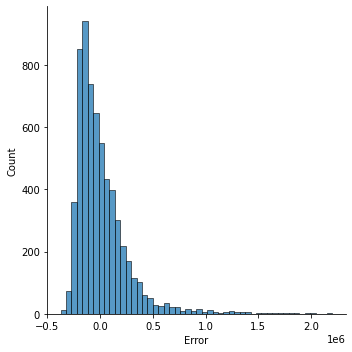

In [262]:
sns.displot(pred_df['Error'], bins=50);

In [263]:
mean_absolute_error(pred_df['Real'], pred_df['Predicho'])

171702.30194223108

In [264]:
mean_squared_error(pred_df['Real'], pred_df['Predicho'])

63689860515.32387

In [265]:
test_score

63727009792.0

In [266]:
# RMSE
test_score**0.5

252442.09195773987

## Modelo 4

In [267]:
modelo_ = Sequential()
modelo_.add(Dense(19,activation='relu'))
modelo_.add(Dense(64,activation='relu'))
modelo_.add(Dense(128,activation='relu'))
modelo_.add(Dense(64,activation='relu'))
modelo_.add(Dense(19,activation='relu'))
modelo_.add(Dense(1))
# compile the model
modelo_.compile(optimizer='adam',loss='mae')

In [268]:
%%time
modelo_.fit(X_train, y_train, epochs=300, batch_size=64, validation_data=(X_test, y_test), verbose=1 )

Epoch 1/300
229/229 [==============================] - 3s 6ms/step - loss: 407114.0625 - val_loss: 166262.9375
Epoch 2/300
229/229 [==============================] - 1s 3ms/step - loss: 165806.0469 - val_loss: 155151.9688
Epoch 3/300
229/229 [==============================] - 1s 3ms/step - loss: 153778.5938 - val_loss: 142798.6250
Epoch 4/300
229/229 [==============================] - 1s 3ms/step - loss: 138223.9531 - val_loss: 125454.7812
Epoch 5/300
229/229 [==============================] - 1s 4ms/step - loss: 123790.9844 - val_loss: 116786.4844
Epoch 6/300
229/229 [==============================] - 1s 4ms/step - loss: 116700.6953 - val_loss: 112152.0391
Epoch 7/300
229/229 [==============================] - 1s 3ms/step - loss: 112613.5859 - val_loss: 109714.3359
Epoch 8/300
229/229 [==============================] - 1s 4ms/step - loss: 110202.6016 - val_loss: 106389.5391
Epoch 9/300
229/229 [==============================] - 1s 3ms/step - loss: 108111.7188 - val_loss: 105267.7266
E

In [269]:
modelo_.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_43 (Dense)            (None, 19)                342       
                                                                 
 dense_44 (Dense)            (None, 64)                1280      
                                                                 
 dense_45 (Dense)            (None, 128)               8320      
                                                                 
 dense_46 (Dense)            (None, 64)                8256      
                                                                 
 dense_47 (Dense)            (None, 19)                1235      
                                                                 
 dense_48 (Dense)            (None, 1)                 20        
                                                                 
Total params: 19,453
Trainable params: 19,453
Non-tra

In [270]:
loss = modelo_.history.history['loss']

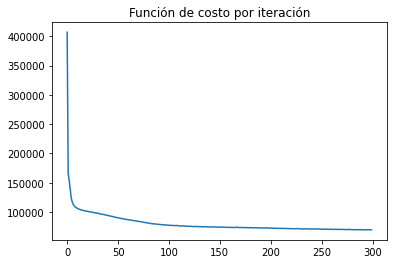

In [271]:
sns.lineplot(x=range(len(loss)),y=loss)
plt.title("Función de costo por iteración");

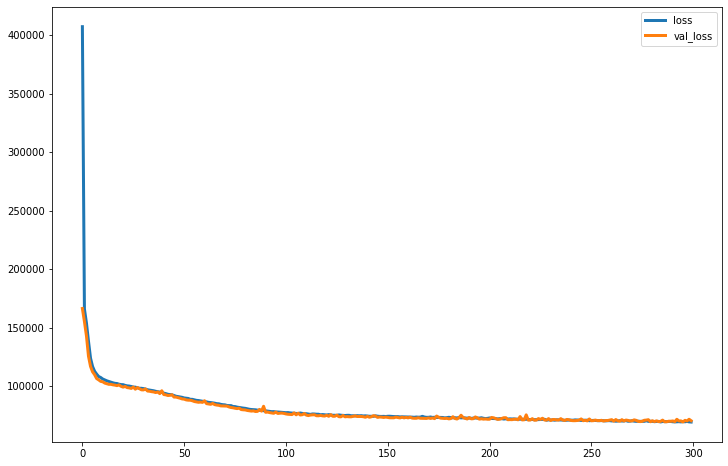

In [272]:
modelo__loss = pd.DataFrame(modelo_.history.history)
modelo__loss.plot(figsize=(12,8), linewidth=3);

In [273]:
training_score = modelo_.evaluate(X_train,y_train,verbose=0)
test_score = modelo_.evaluate(X_test,y_test,verbose=0)

In [274]:
training_score

69432.125

In [275]:
test_score

70353.4453125

### Análisis de resultados

In [276]:
test_predictions = modelo_.predict(X_test)

In [277]:
test_predictions.shape

(6275, 1)

In [278]:
pred_df = pd.DataFrame(y_test, columns=['y_test'])

In [279]:
pred_df

,y_test
0,739999.00
1,545000.00
2,312000.00
3,250000.00
4,605000.00
...,...
6270,459500.00
6271,569900.00
6272,545800.00
6273,380000.00


In [280]:
test_predictions = pd.Series(test_predictions.reshape(6275,))

In [281]:
test_predictions.shape

(6275,)

In [282]:
pred_df = pd.concat([pred_df,test_predictions], axis=1)

In [283]:
pred_df.columns = ['Real','Predicho']

In [284]:
pred_df

,Real,Predicho
0,739999.00,825378.75
1,545000.00,458835.28
2,312000.00,267223.22
3,250000.00,301574.72
4,605000.00,619480.50
...,...,...
6270,459500.00,360341.09
6271,569900.00,539586.69
6272,545800.00,545431.44
6273,380000.00,307074.41


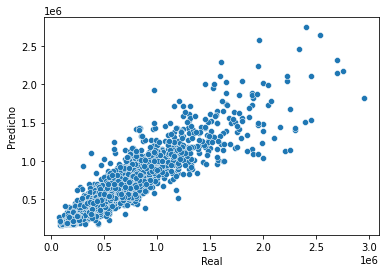

In [285]:
sns.scatterplot(x='Real', y='Predicho', data=pred_df);

In [286]:
pred_df['Error'] = pred_df['Real'] - pred_df['Predicho']

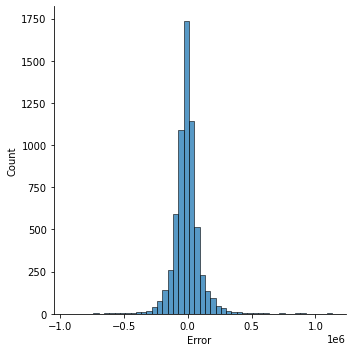

In [287]:
sns.displot(pred_df['Error'], bins=50);

In [288]:
mean_absolute_error(pred_df['Real'], pred_df['Predicho'])

70353.42996015937

In [289]:
mean_squared_error(pred_df['Real'], pred_df['Predicho'])

12854664475.703234

In [290]:
test_score

70353.4453125

In [291]:
# RMSE
test_score**0.5

265.24223892981297

### Predicción en datos no vistos

In [96]:
import random

random.seed(42)
random_ind = random.randint(0, len(df2))

new_customer = df2.drop('price', axis=1).iloc[random_ind]
new_customer

bedrooms           3.00
bathrooms          1.75
sqft_living     1360.00
sqft_lot        4998.00
floors             1.00
waterfront         0.00
view               0.00
condition          3.00
grade              8.00
sqft_basement      0.00
yr_built        1968.00
sqft_living15   1350.00
renovated          1.00
year            2015.00
month              4.00
Name: 3820, dtype: float64

In [103]:
(model.predict(new_customer.values.reshape(1,15)) > 0.5).astype("int32")[0][0]

1

### Persistencia de modelo

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
# No es necesario crear manualmente la carpeta desde Google Drive
model.save('/content/drive/MyDrive/MODULO4/PRACTICA1/models/my_model.h5')

In [ ]:
later_model = load_model('/content/drive/MyDrive/MODULO4/PRACTICA1/models/my_model.h5')

In [ ]:
later_model.predict(new_customer)

array([[420.36273]], dtype=float32)